## East West Airlines
Objective: To identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [545]:
## importing Libraries/Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [547]:
data=pd.read_excel('East West Airlines.xlsx', sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


Description of data
ID -- Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [549]:
df=data.copy()


In [552]:
df.shape

(3999, 12)

In [554]:
df.rename(columns={'ID#':'ID','Award?':'Award'}, inplace=True)

In [556]:
df.set_index('ID',inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [560]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [562]:
df.duplicated().sum()

1

There are no duplicate rows in the data

In [565]:
df.drop_duplicates(inplace=True)

In [567]:
df.shape

(3998, 11)

In [569]:
# checking the unique values for CC mile columns
print('The unique values in cc1-mile columns are:',df['cc1_miles'].unique())
print('The unique values in cc2-mile columns are:',df['cc2_miles'].unique())
print('The unique values in cc3-mile columns are:',df['cc3_miles'].unique())

The unique values in cc1-mile columns are: [1 4 3 2 5]
The unique values in cc2-mile columns are: [1 2 3]
The unique values in cc3-mile columns are: [1 3 2 4 5]


Exploratory data analysis

In [572]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

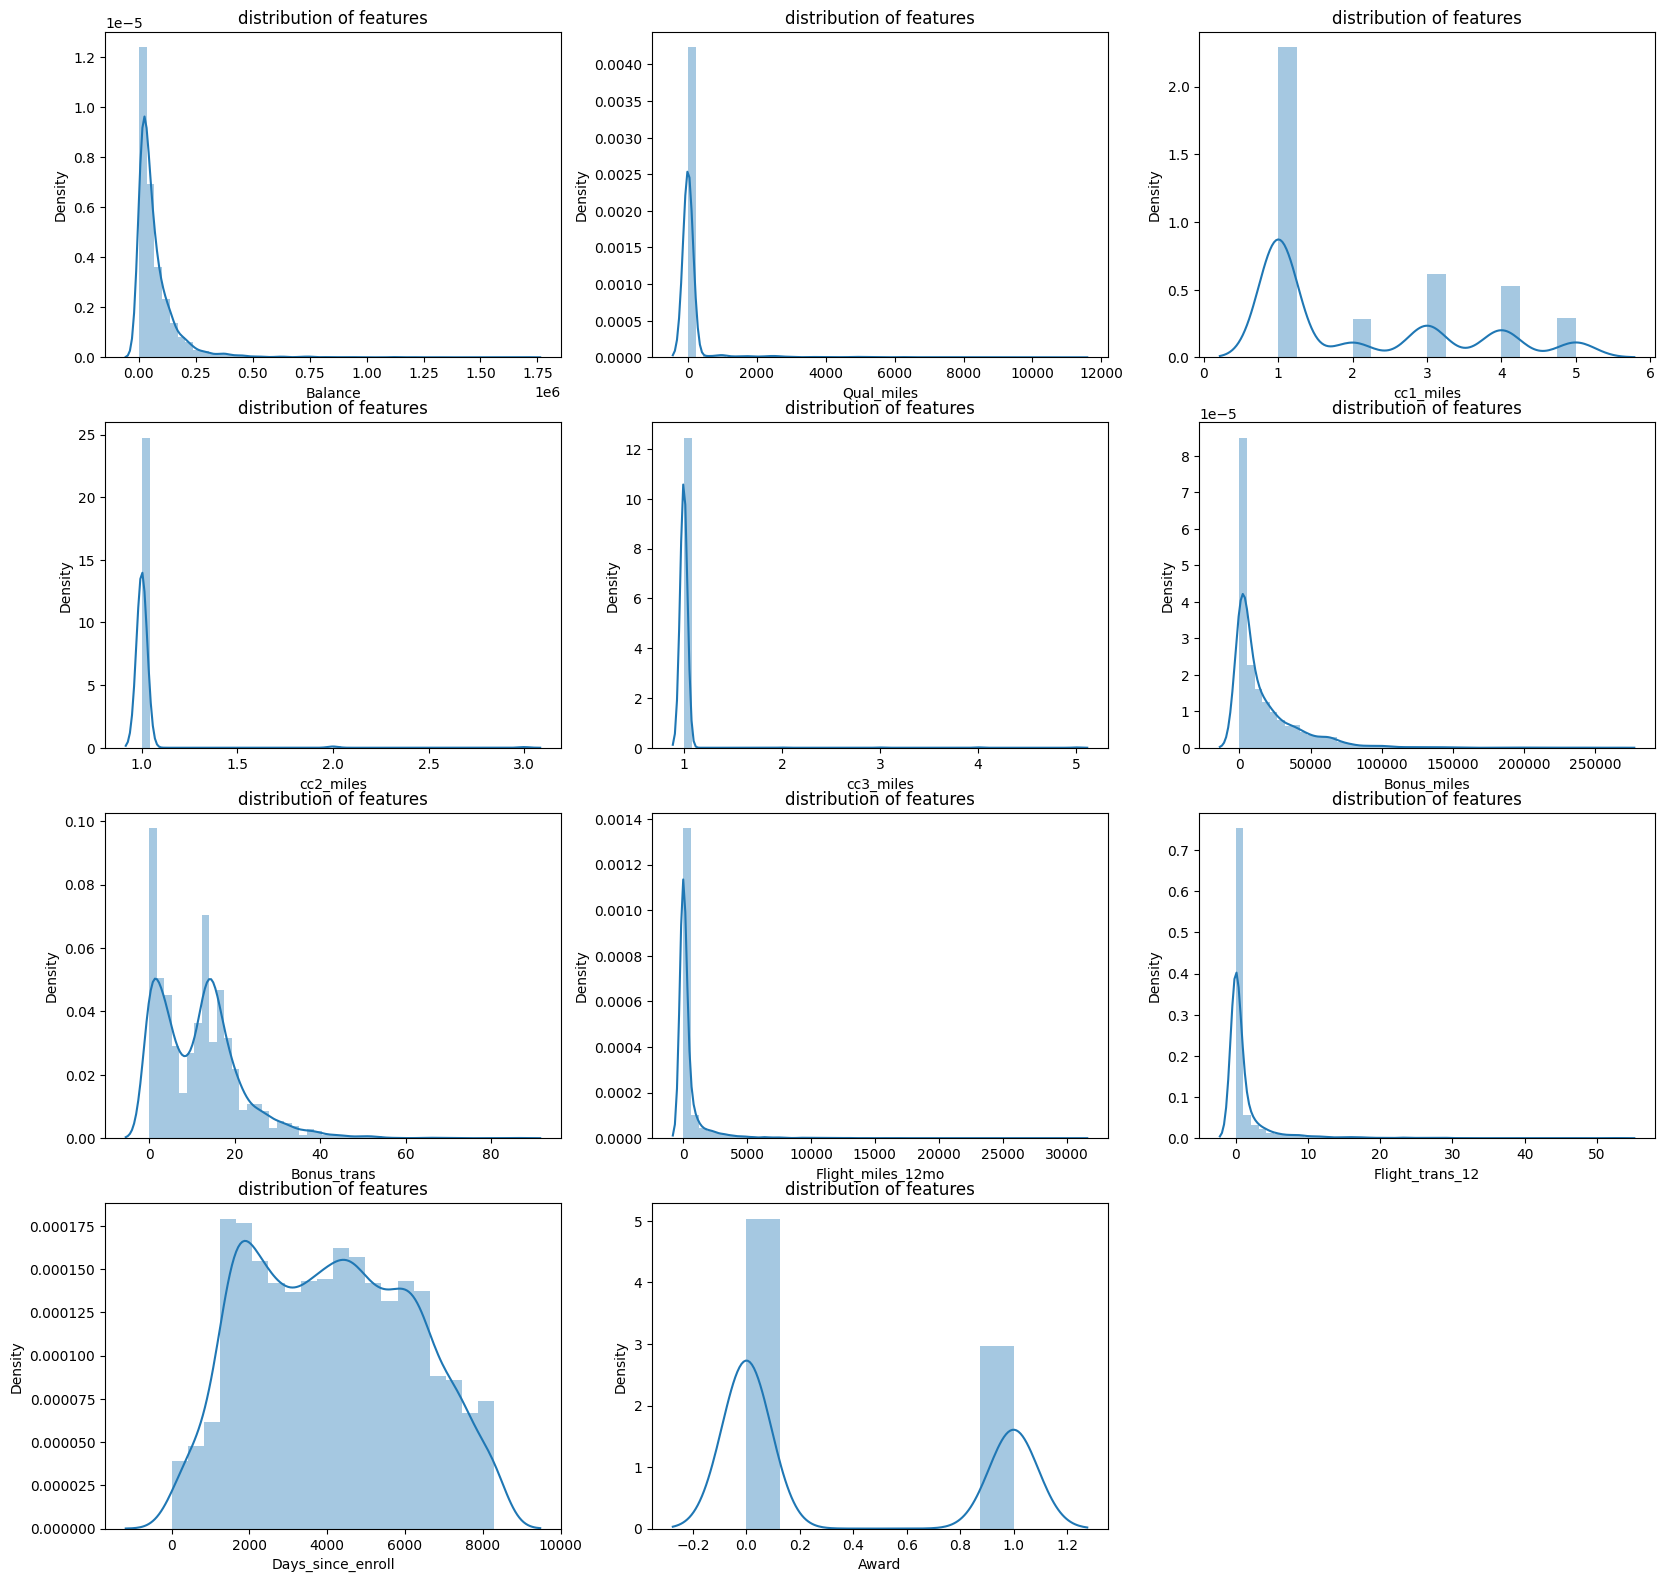

In [574]:
# A univariate distribution of features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in df:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_num+=1
    plt.title('distribution of features')
plt.savefig('distribution of fead=tures.jpg')
plt.show()

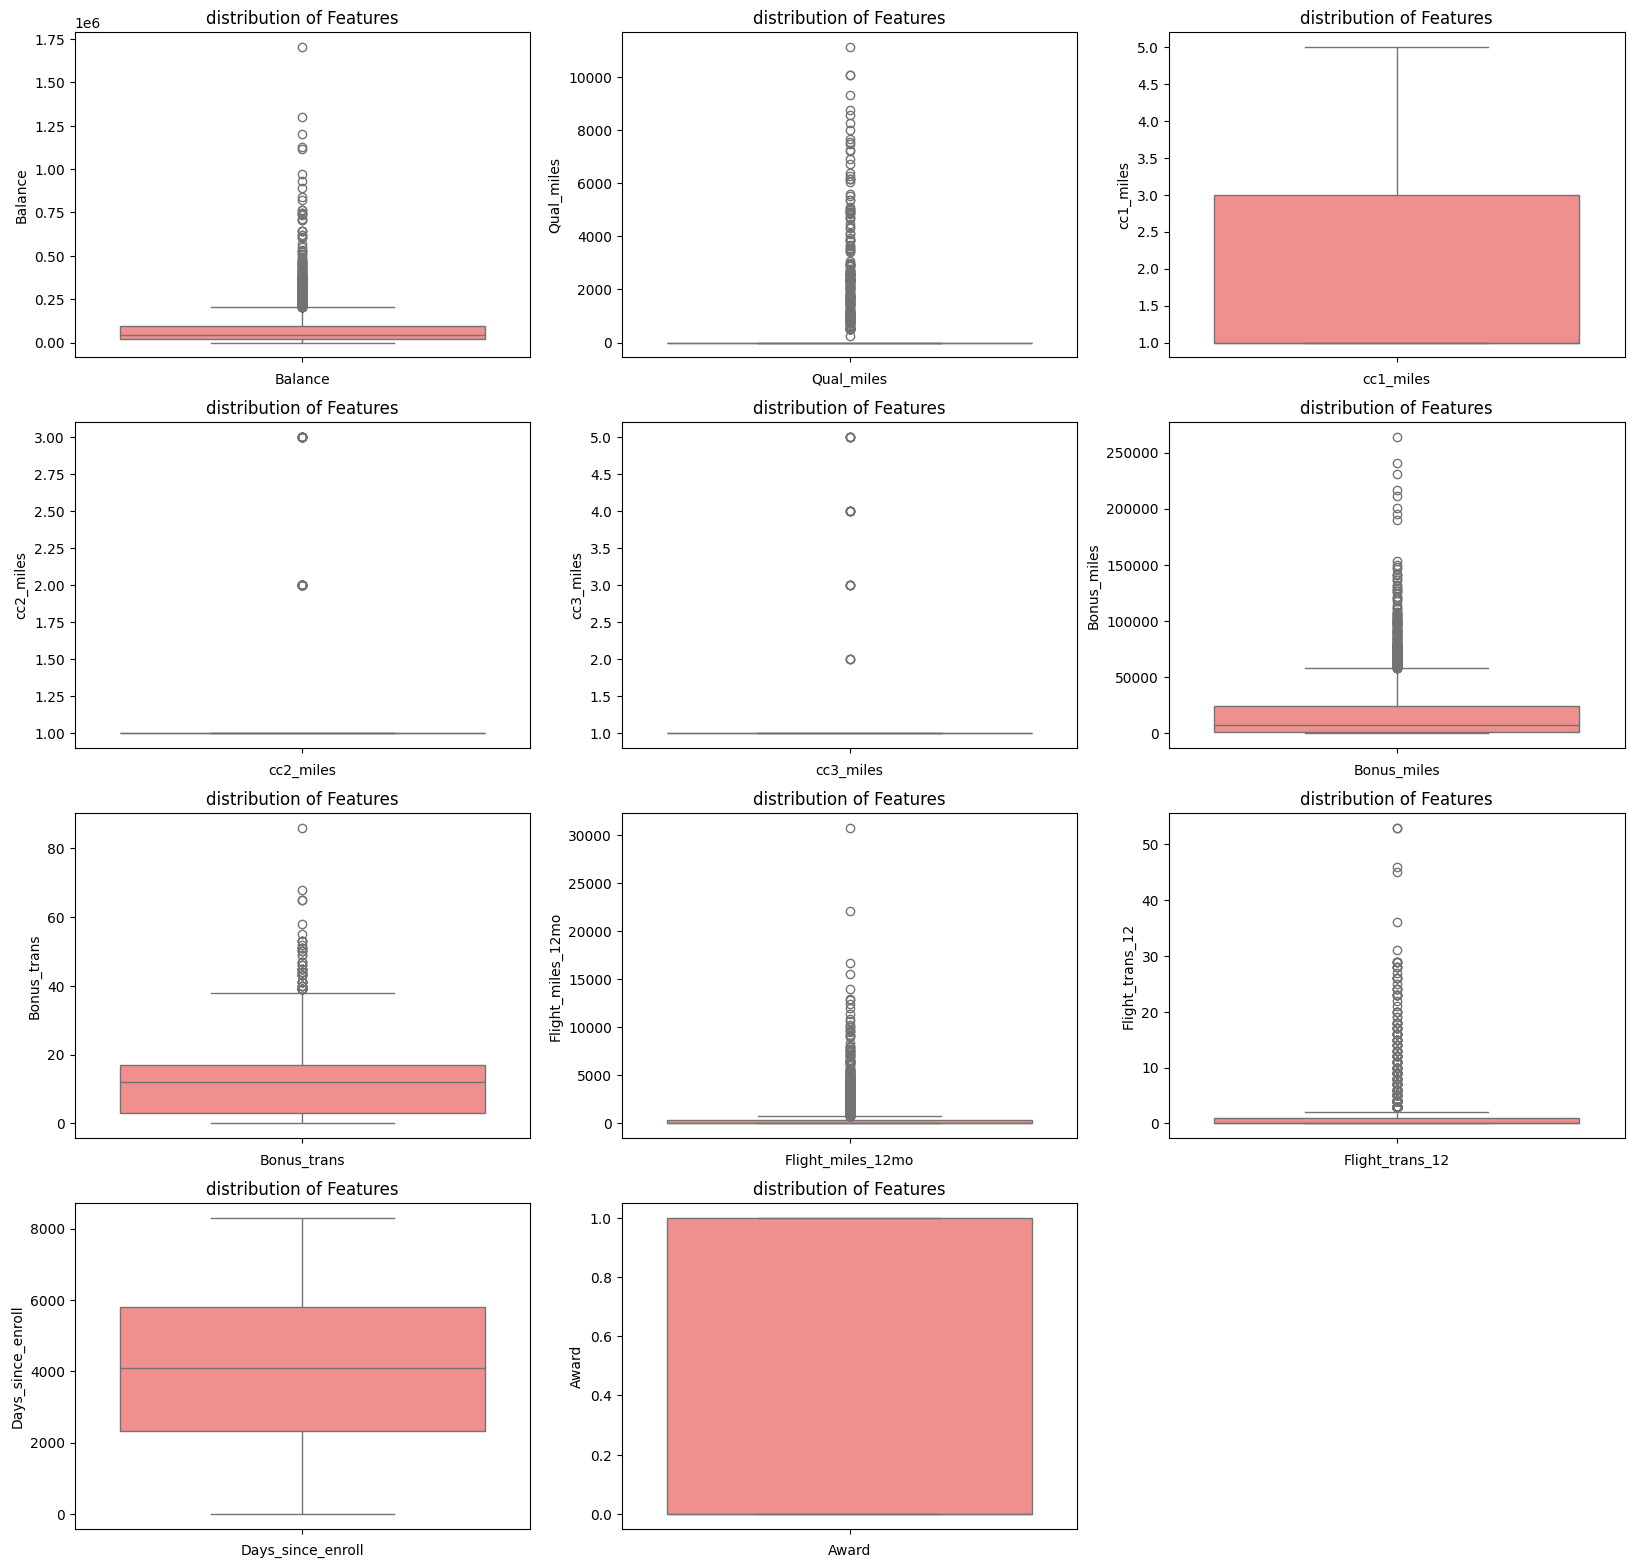

In [575]:
#  A Univariate box plot of features
plt.figure(figsize=(20,60),facecolor='White')
plot_num=1
for col in df:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(df[col],palette='spring')
    plt.xlabel(col)
    plot_num+=1
    plt.title('distribution of Features')

plt.savefig('Box plot of Features.jpeg')

plt.show()

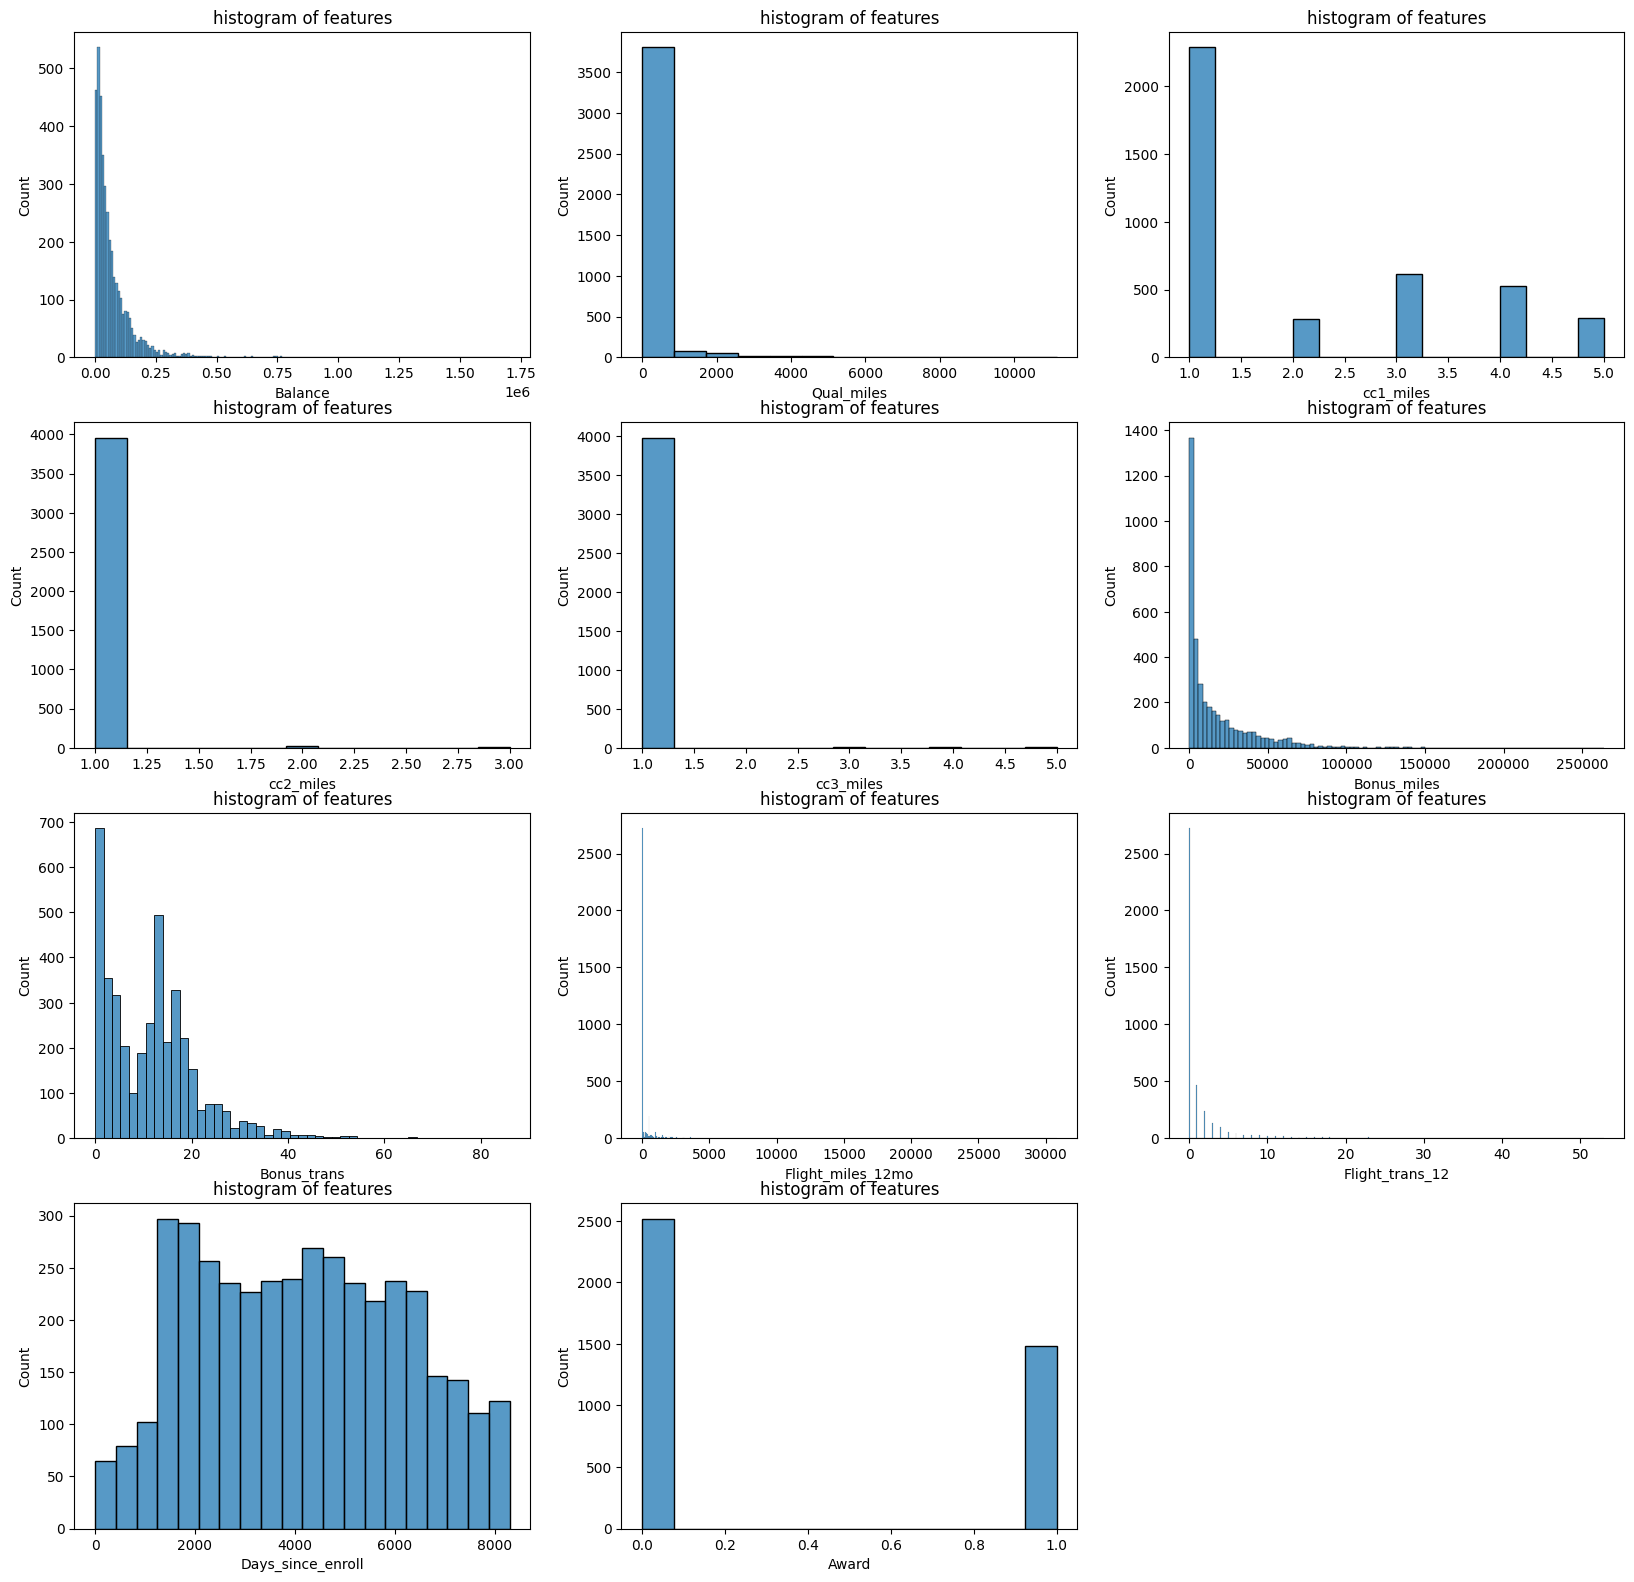

In [576]:
# A univariate histogram of features
plt.figure(figsize=(20,60),facecolor='white')
plot_num=1
for col in df:
    ax=plt.subplot(12,3,plot_num)
    sns.histplot(df[col],palette='spring')
    plt.xlabel(col)
    plot_num+=1
    plt.title('histogram of features')
plt.savefig('histogram of features.jpeg')
plt.show()

In [577]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

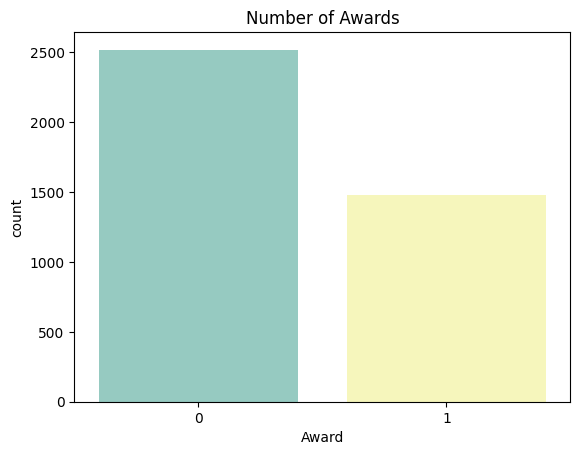

In [578]:
 # Number of awards granted/not granted

sns.countplot(data=df, x='Award', palette='Set3')
plt.title('Number of Awards')
plt.savefig('Total Awards.jpeg', bbox_inches="tight", dpi=200)
plt.show()

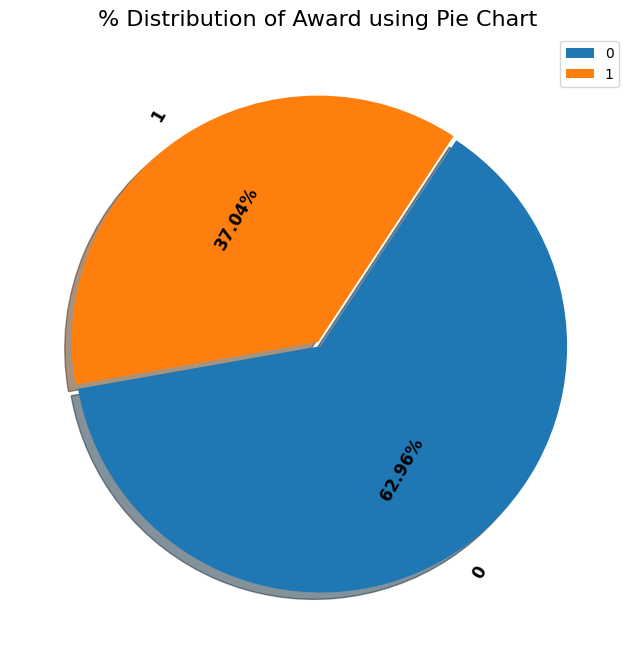

In [579]:
plt.figure(figsize = (9,8))
plt.pie(df['Award'].value_counts(), labels= df['Award'].unique(),
       explode = [0.02,0.0], autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large', 'fontweight':'bold', 'rotation': 60, 'color':'black'})
plt.legend(loc= 'upper right')
plt.title("% Distribution of Award using Pie Chart", fontsize = 16)
plt.savefig('pie chart of award.jpg',dpi=200)
plt.show()

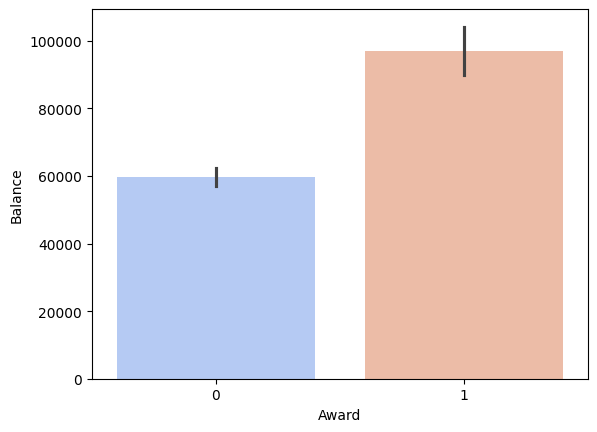

In [580]:
# Balance wise of awards granted/not granted
sns.barplot(data=df, x='Award', y='Balance', palette='coolwarm')
plt.savefig('Balance wise Awards.jpeg',bbox_inches='tight', dpi=200)
plt.show()

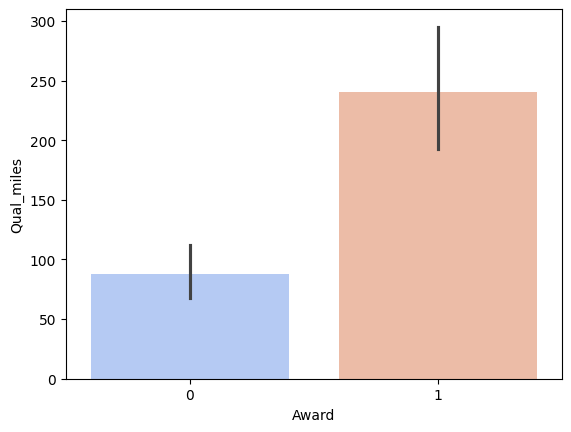

In [581]:
# Qual_miles wise of awards granted/not granted
sns.barplot(data=df, x='Award', y='Qual_miles',palette='coolwarm')
plt.savefig('Qual_miles wise Awards.jpg',bbox_inches='tight',dpi=200)
plt.show()

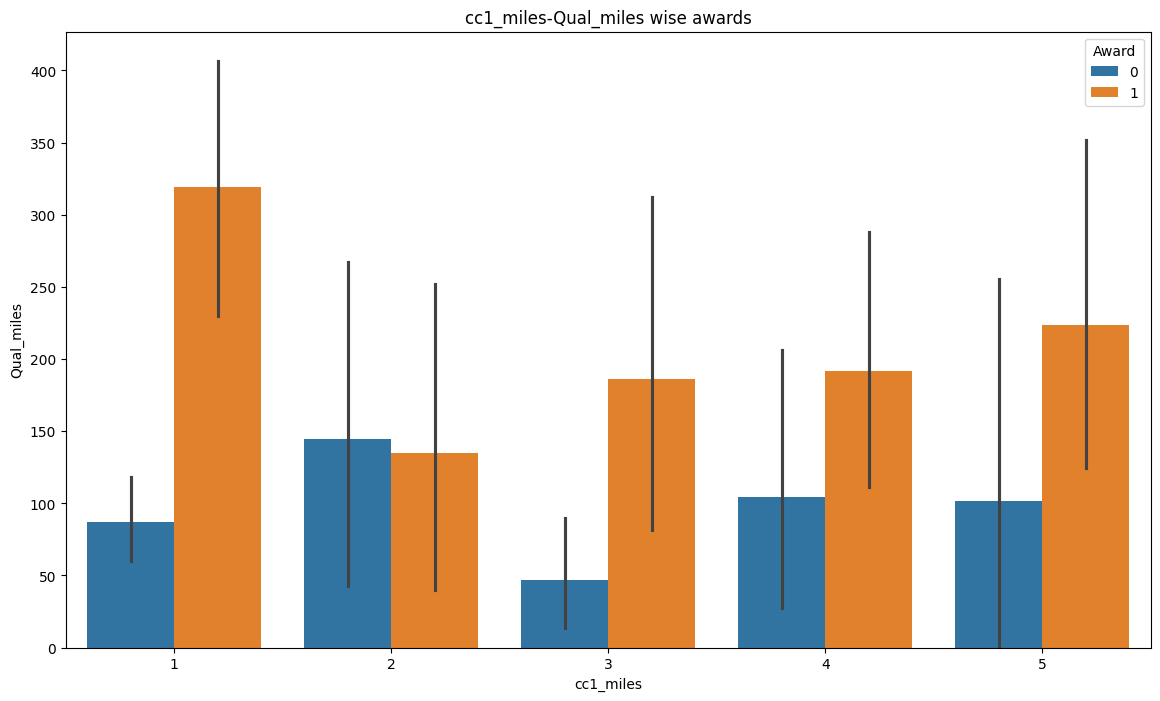

In [582]:
# cc1_miles-Qual_miles wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc1_miles',y='Qual_miles',hue='Award')
plt.savefig('cc1_miles-Qual_miles wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc1_miles-Qual_miles wise awards')
plt.show()

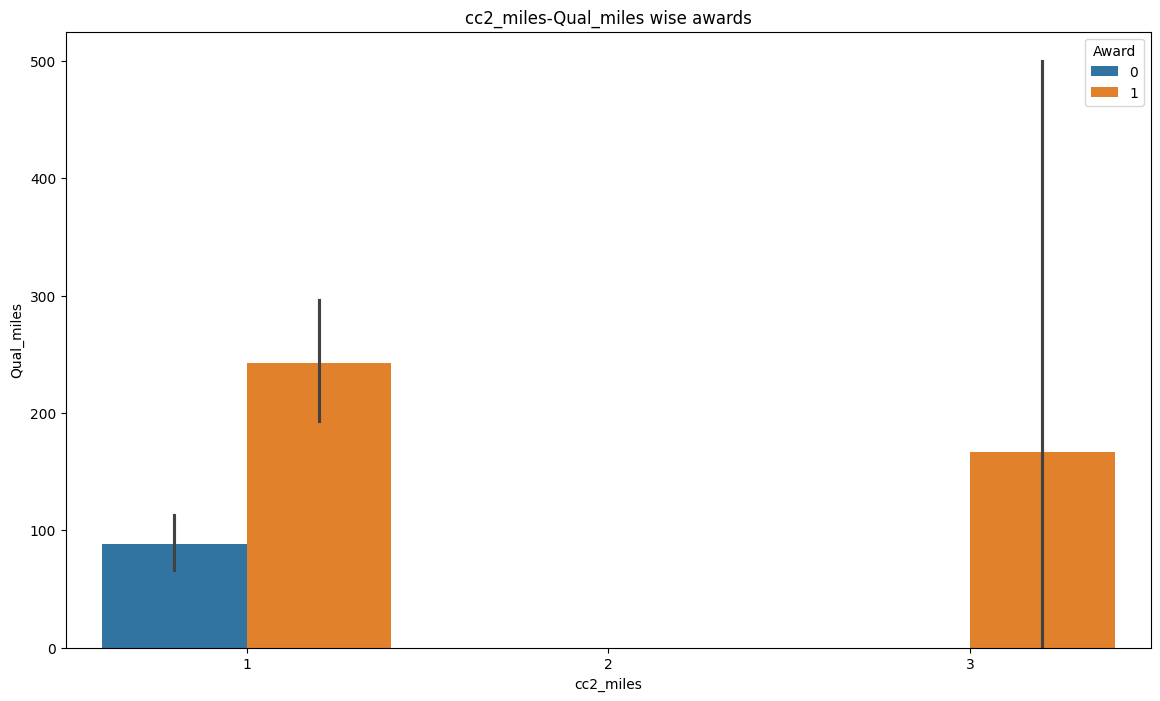

In [583]:
# cc2_miles-Qual_miles wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc2_miles',y='Qual_miles',hue='Award')
plt.savefig('cc2_miles-Qual_miles wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc2_miles-Qual_miles wise awards')
plt.show()

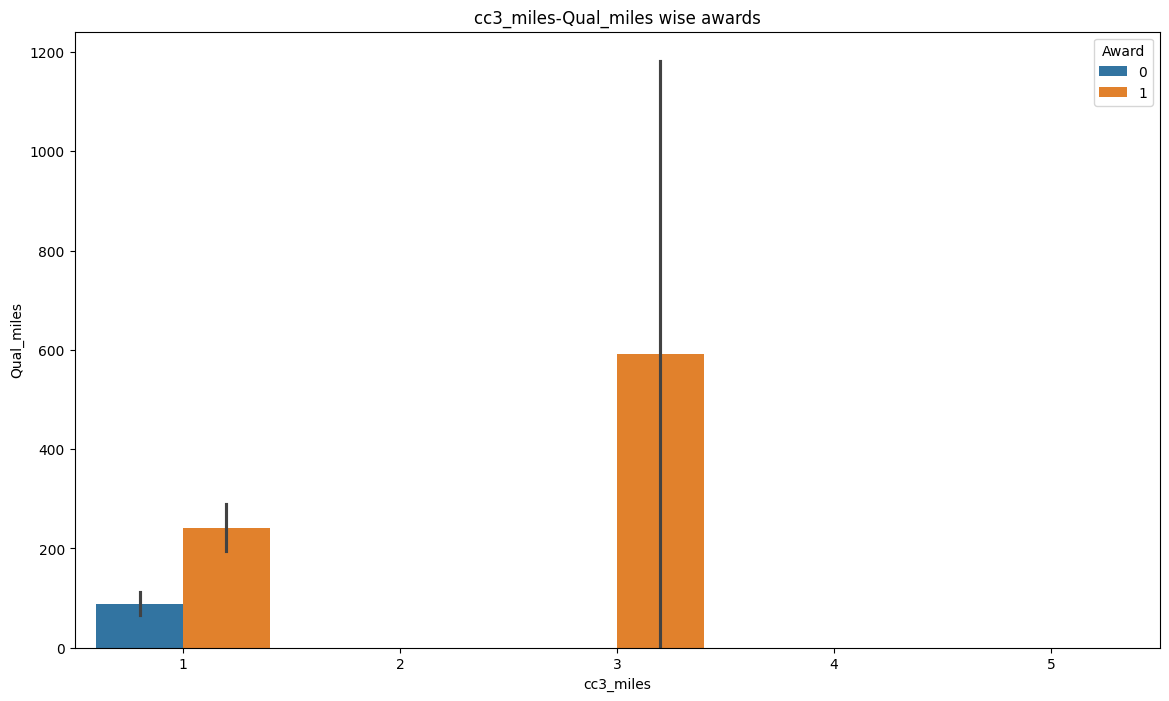

In [584]:
# cc3_miles-Qual_miles wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc3_miles',y='Qual_miles',hue='Award')
plt.savefig('cc3_miles-Qual_miles wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc3_miles-Qual_miles wise awards')
plt.show()

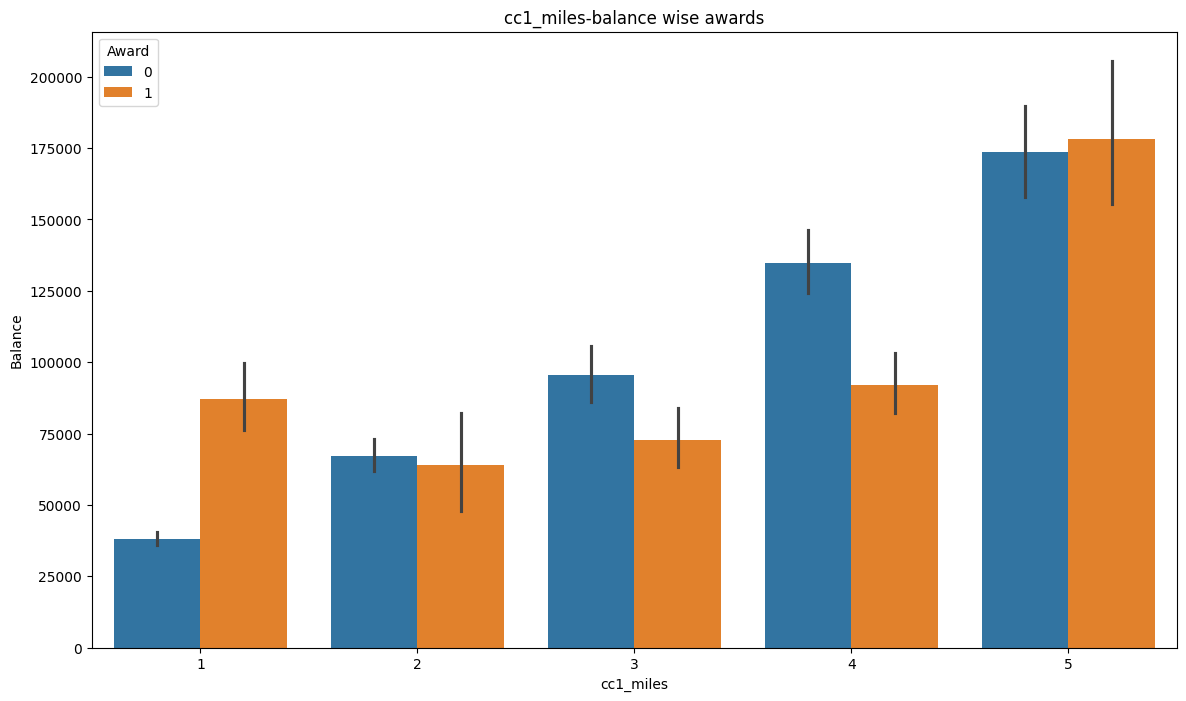

In [586]:
# cc1_miles-balance wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc1_miles',y='Balance',hue='Award')
plt.savefig('cc1_miles-balance wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc1_miles-balance wise awards')
plt.show()

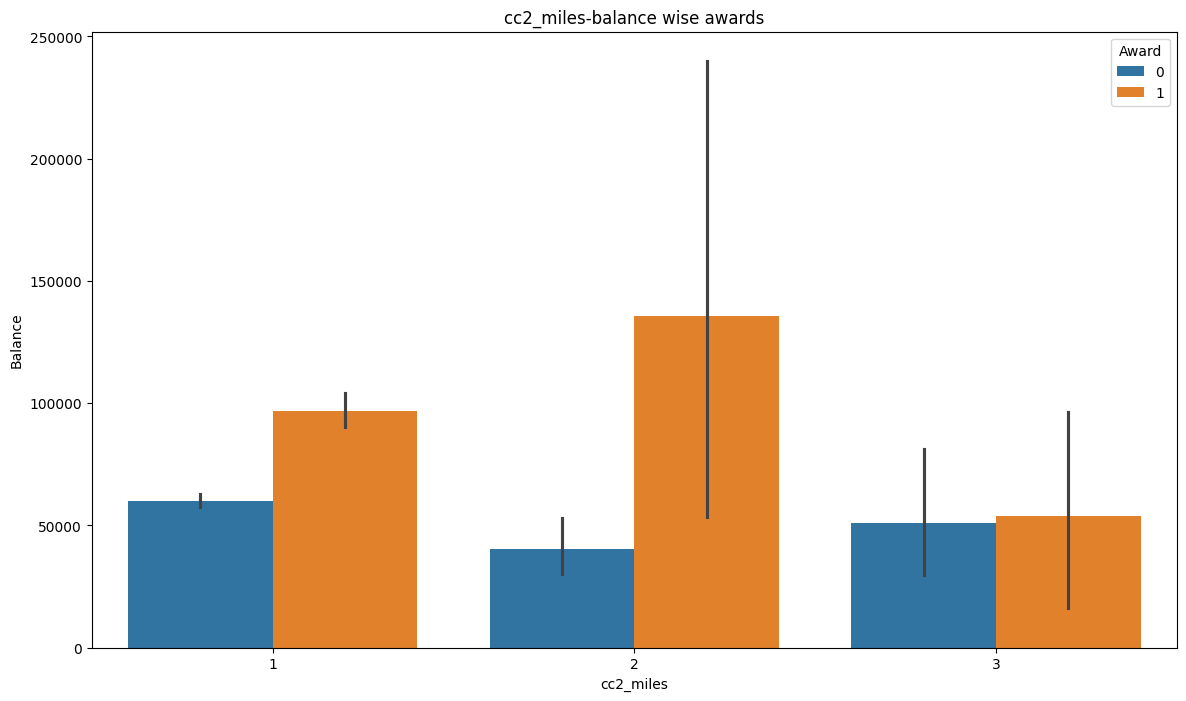

In [587]:
# cc2_miles-balance wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc2_miles',y='Balance',hue='Award')
plt.savefig('cc2_miles-balance wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc2_miles-balance wise awards')
plt.show()

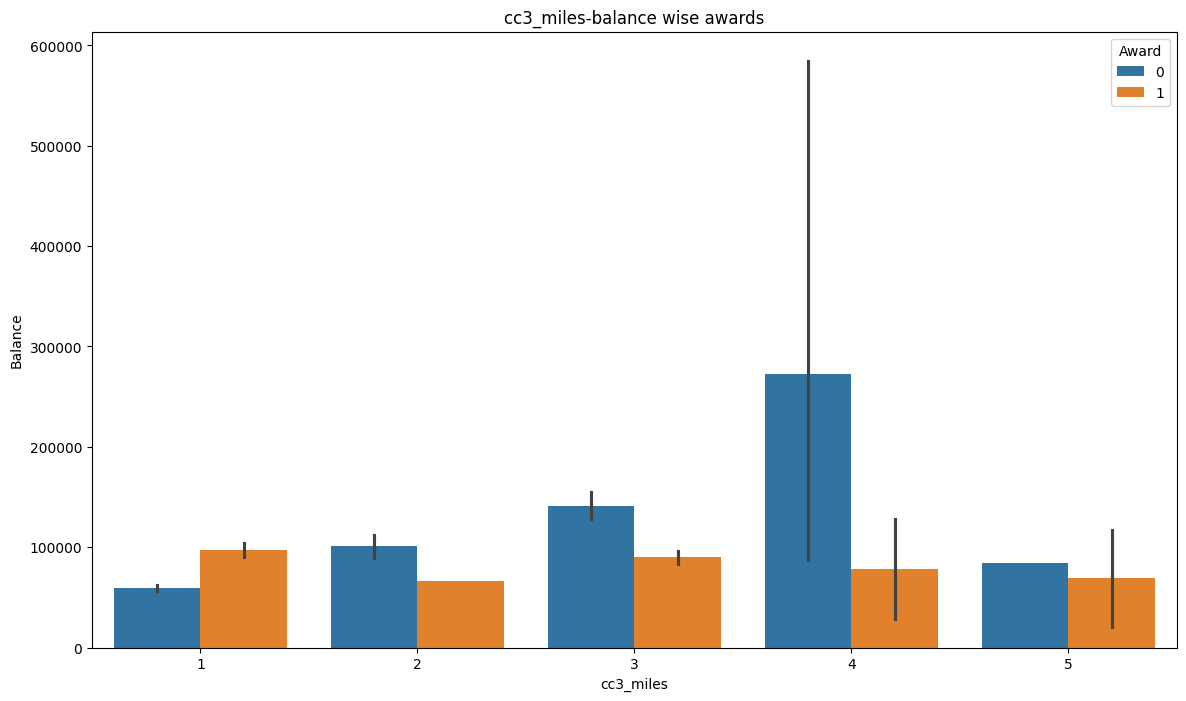

In [588]:
# cc3_miles-balance wise awards 
plt.figure(figsize=(14,8))
sns.barplot(data=df,x='cc3_miles',y='Balance',hue='Award')
plt.savefig('cc3_miles-balance wise awards.jpg',bbox_inches='tight',dpi=200)
plt.title('cc3_miles-balance wise awards')
plt.show()

In [589]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


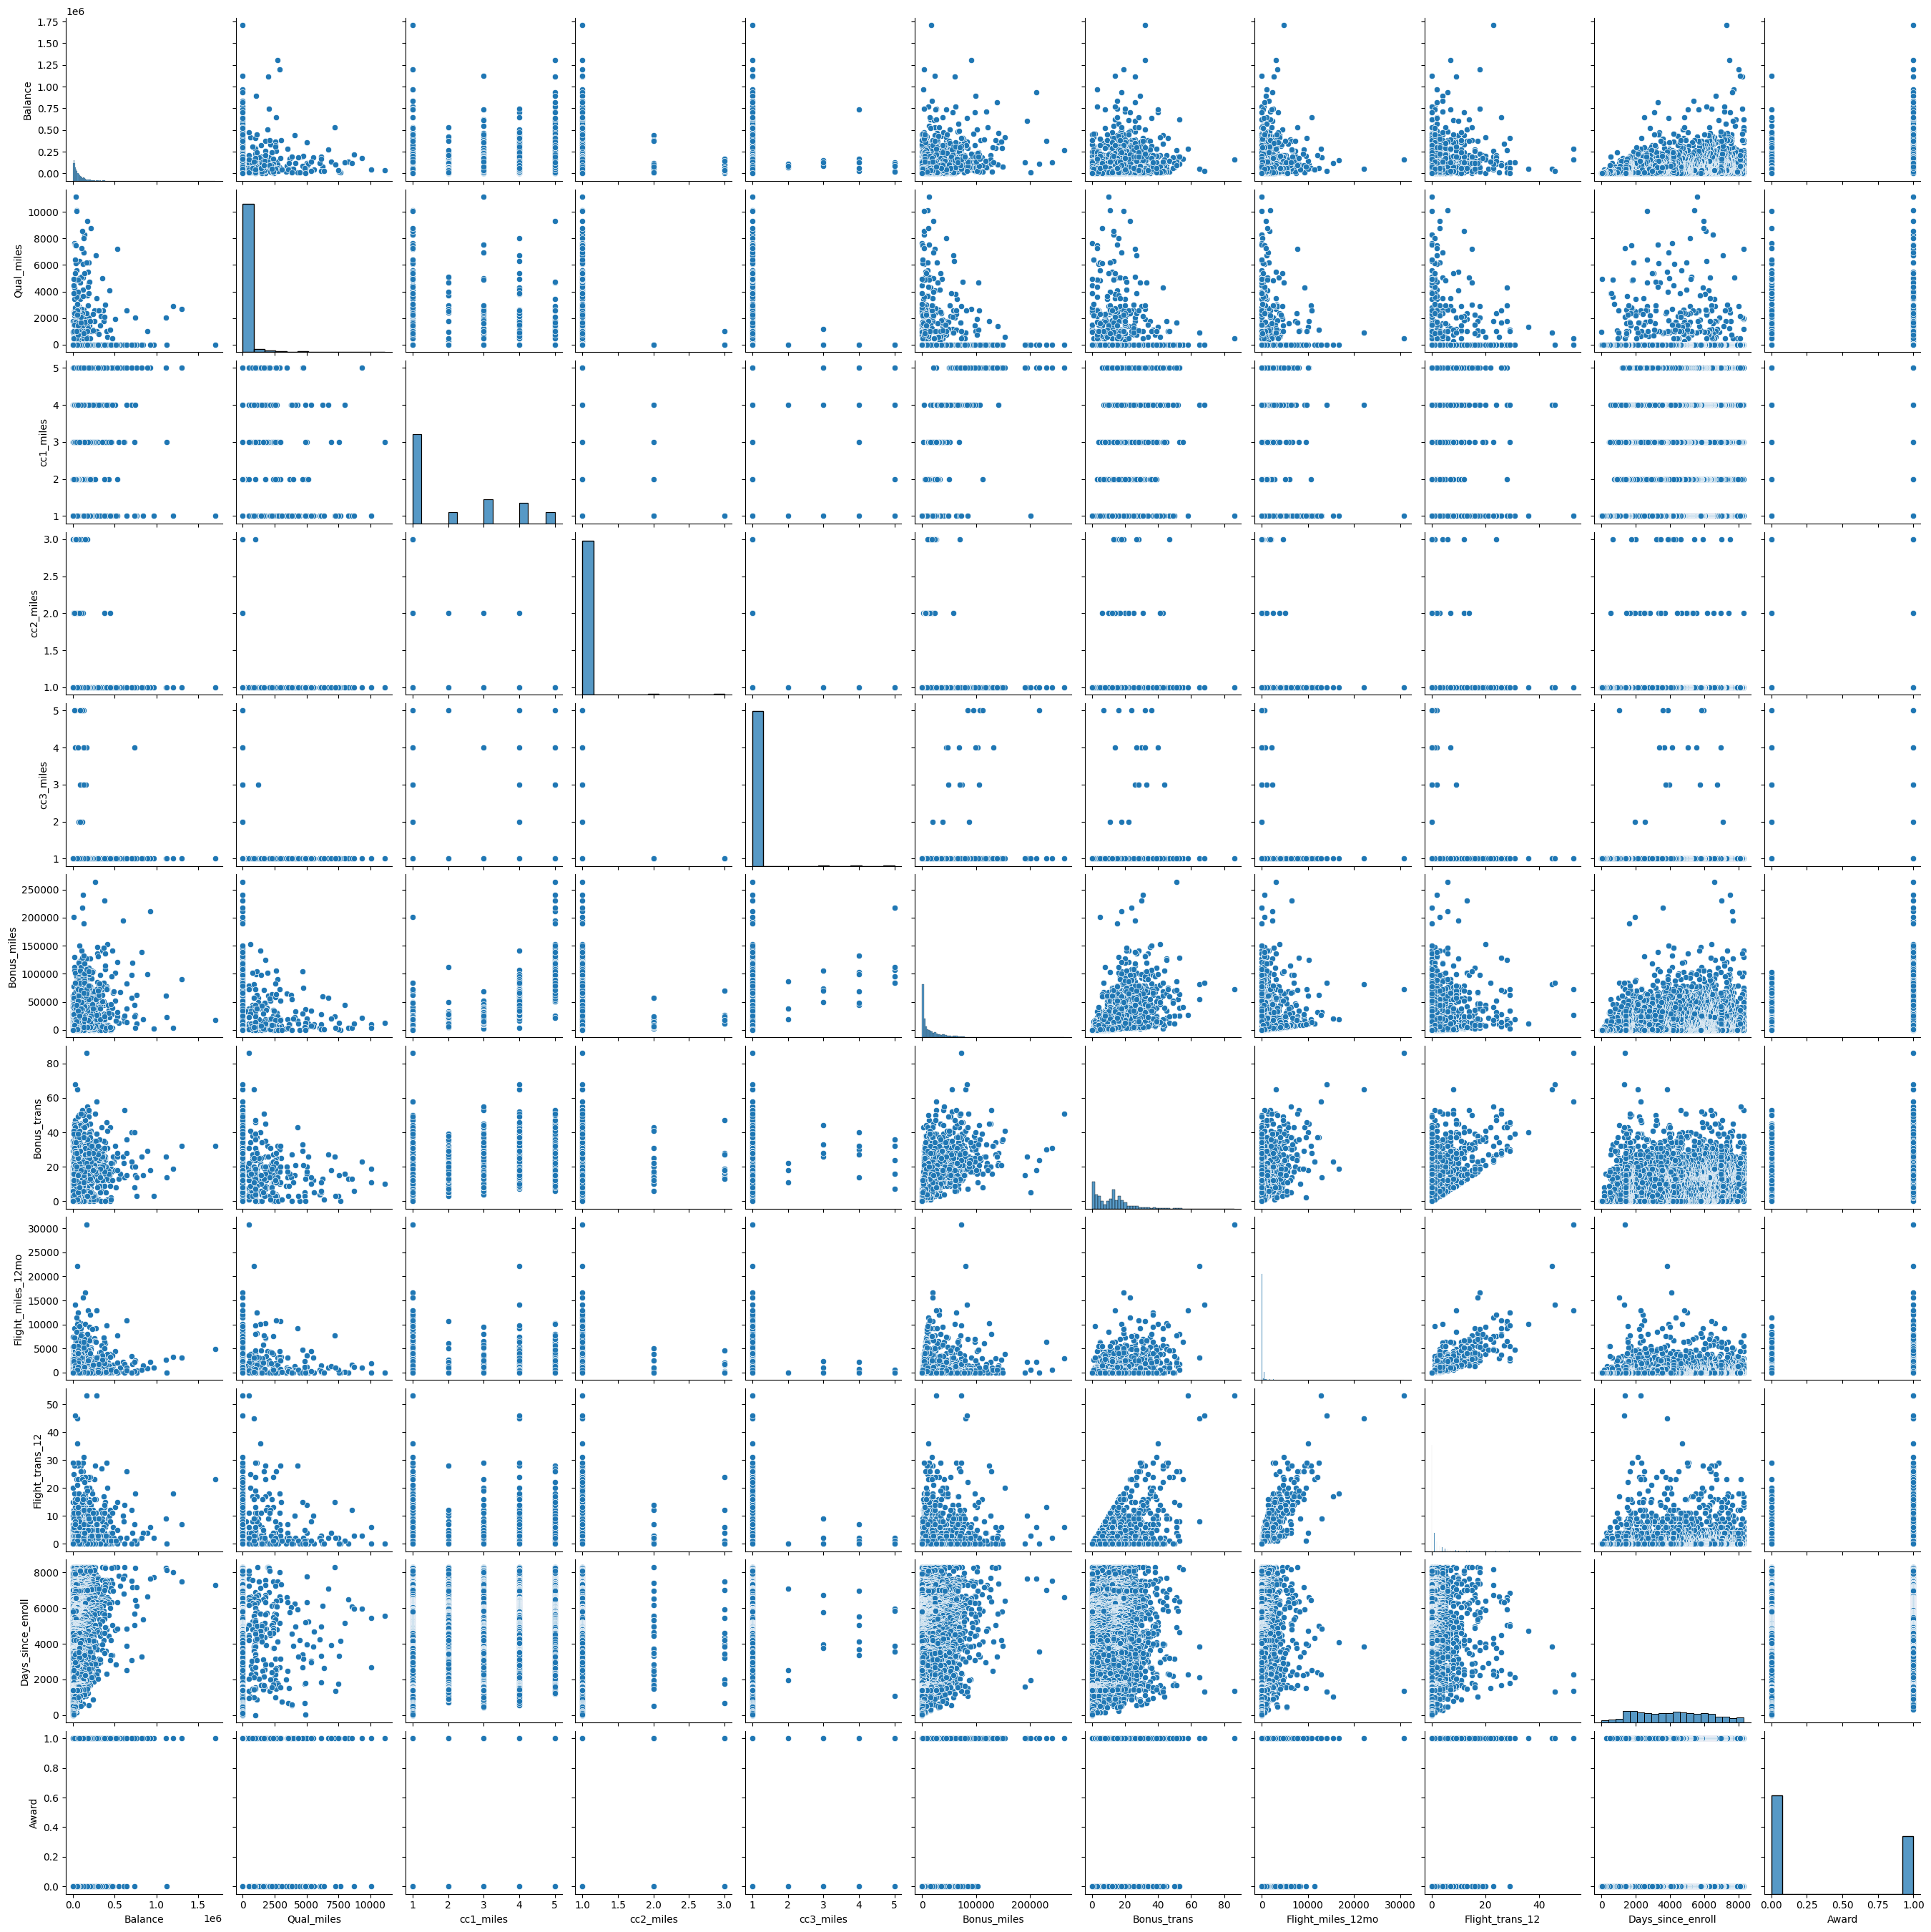

In [590]:
sns.pairplot(df,palette='spring')

Scalling the Data

In [593]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [594]:
df_sc=sc.fit_transform(df)
df_sc.shape

(3998, 11)

In [595]:
df_sc

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

In [596]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [597]:
df1=mn.fit_transform(df_sc)
df1.shape

(3998, 11)

In [598]:
from sklearn.cluster import KMeans

In [599]:
model=KMeans(n_clusters=3,random_state=1)

In [600]:

model_fit=model.fit(df1)

In [601]:
pred=model_fit.predict(df1)

In [602]:
pred

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [603]:
#pred.shape or
len(pred)

3998

In [604]:
dd=pd.DataFrame(pred,columns=['Cluster1'])


Elbow method for determining clusters value

In [609]:
wcss = []
for i in range(1,21):
    model = KMeans(n_clusters=i)
    model_fit=model.fit(df1)
    wcss.append(model.inertia_)

In [612]:
wcss

[1830.4680233661593,
 823.5583625482046,
 625.1109608846491,
 537.394380182786,
 402.8566184013314,
 319.00257930173456,
 295.8603762666047,
 263.1862983083348,
 266.6827537302381,
 241.79775296456484,
 226.48953770037863,
 205.49518231871775,
 200.38634235458844,
 196.8014356533534,
 188.0476150096129,
 177.71678157139127,
 173.31554243446595,
 167.45957333658131,
 164.8515742052974,
 158.3616518597654]

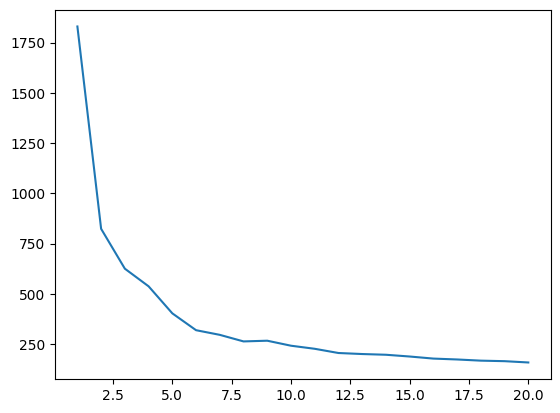

In [614]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),wcss)


Here, it is breaking at 5th position, so this is the best optimum clusters to select cluster k=5

In [617]:
modelNEW=KMeans(n_clusters=5,random_state=1)
modelNEW_fit=modelNEW.fit(df1)
pred_new=modelNEW_fit.predict(df1)

In [618]:
dd=pd.DataFrame(pred,columns=['Cluster2'])

In [620]:
df['Cluster1']=pred
df['Cluster2']=pred_new

In [621]:
# Cluster summary of important features
cluster_summary = df.groupby('Cluster2')[[
    'Bonus_trans', 
    'Flight_miles_12mo', 
    'Flight_trans_12', 
    'Days_since_enroll',   # ← replace with exact column name
    'Award'
]].mean()


print("Cluster Summary:")
print(cluster_summary)

# Award distribution per cluster
award_distribution = df.groupby('Cluster2')['Award'].value_counts(normalize=True).unstack()
print("\nAward Distribution (% within each cluster):")
print(award_distribution)


Cluster Summary:
          Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Cluster2                                                                       
0           10.476969        1030.112927         3.148588        4338.867756   
1            6.913594         243.834101         0.728111        5567.925115   
2           20.201733         713.728960         2.142327        4863.439356   
3           17.233010         224.100324         0.627832        4419.553398   
4            6.179437         213.057226         0.604268        1992.785645   

          Award  
Cluster2         
0           1.0  
1           0.0  
2           1.0  
3           0.0  
4           0.0  

Award Distribution (% within each cluster):
Award       0    1
Cluster2          
0         NaN  1.0
1         1.0  NaN
2         NaN  1.0
3         1.0  NaN
4         1.0  NaN


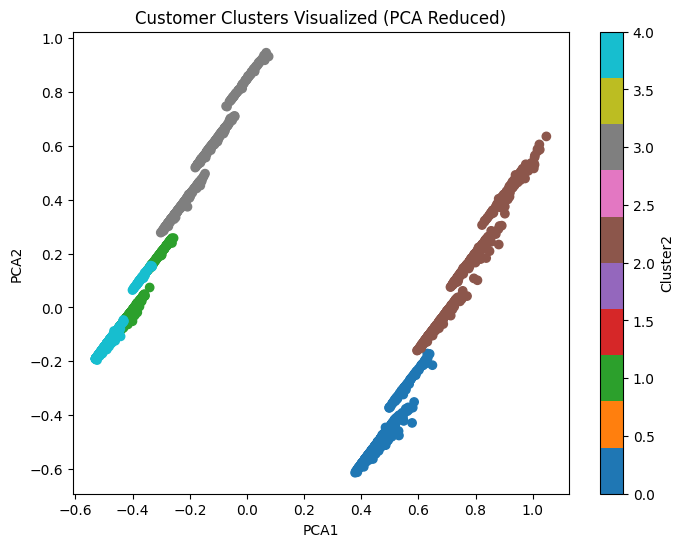

In [623]:
from sklearn.decomposition import PCA

# Run PCA on original scaled features (df1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df1)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster2'], cmap='tab10')
plt.title('Customer Clusters Visualized (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster2')
plt.show()


In [624]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster1,Cluster2,PCA1,PCA2
ID,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,-0.407916,-0.020730
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,-0.407387,-0.019983
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,-0.401857,-0.011683
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,-0.408863,-0.022058
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,2,0.833475,0.240296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0.397783,-0.586222
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0.396029,-0.587848
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,2,0.606444,-0.144865


<Axes: xlabel='Balance', ylabel='Bonus_miles'>

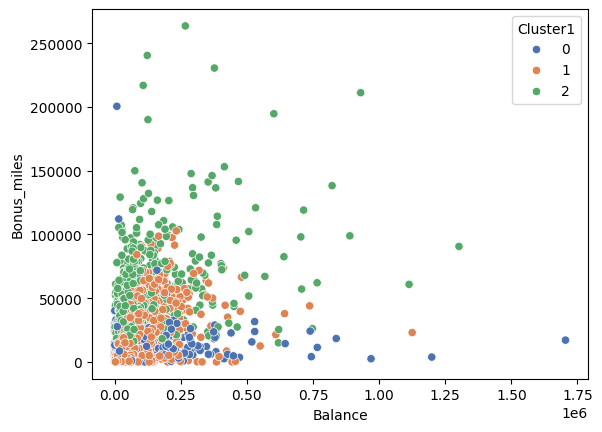

In [626]:
sns.scatterplot(x = 'Balance', y = 'Bonus_miles', data = df, hue = 'Cluster1', palette='deep')

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

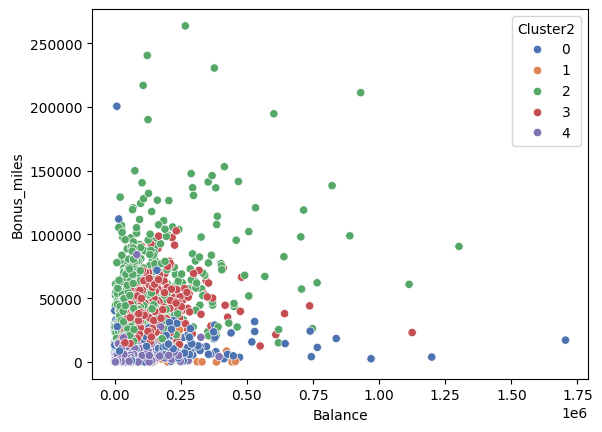

In [627]:
sns.scatterplot(x = 'Balance', y = 'Bonus_miles', data = df, hue = 'Cluster2', palette='deep')

### ✍️ Final Inference Based on Clustering

- **Cluster 0**: High bonus and flight miles, long enrollment history, high award ratio → Likely loyal and profitable flyers.
- **Cluster 1**: Low flight and bonus transactions, newly enrolled → Needs retention or promotional targeting.
- **Cluster 2**: Mixed behavior, moderate award rate → Good candidates for tier upgrades or selective offers.

These insights can help the airline tailor marketing campaigns and rewards programs more effectively.
